In [2]:
import pandas as pd
import re
import numpy as np
import statistics as stat
#from scipy import stats

In [2]:
pip install --upgrade statistics

Requirement already up-to-date: statistics in c:\users\mkdty\anaconda3\lib\site-packages (1.0.3.5)Note: you may need to restart the kernel to use updated packages.



In [3]:
def outlier(col):
    for i in cars.make_model.unique():
        for j in cars.Displacement.unique():
            for k in cars.hp.unique():
                    x = cars[col][(cars.make_model == i) & (cars.Displacement == j) & (cars.hp == k)]
                    cars[col][(cars.make_model == i) & (cars.Displacement == j) & (cars.hp == k)] = np.log(x)


In [4]:
def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.1, print_list = False):
    z_scores = zscore(df[col].dropna())
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
        df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), 
               colors="r", ls = ":"
              )
    plt.annotate("Zscore : {}\nValue : {}\nPercentile : {}".format(best_treshold, outlier_limit, 
                                                                   (np.round(percentile_threshold, 3), 
                                                                    np.round(100-percentile_threshold, 3))), 
                 (best_treshold, df_outlier.outlier_count.max()/2))
    #plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, outlier_limit, np.percentile)

def outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step)
    plt.show()

In [5]:
#outlier_zscore(cars,"km")

In [6]:
pd.set_option('display.max_rows', 999)

In [7]:
from scipy.stats import zscore

In [8]:
def numerization(x):
    return [re.sub('\D', '', i) if i is not None else '' for i in x] 
#scout['km']=numerization(scout['km'])
#scout['km']=pd.to_numeric(scout['km'])

In [9]:
def show_nans(df, limit):
    missing = df.isnull().sum()*100/df.shape[0]
    return missing.loc[lambda x : x > limit] 
# limit değerinden yüksek oranda missing value içeren sütunları sergiler. 
# örneğin limit = 35 ise yüzde 35'den fazla missing value içeren sütunları görmenizi sağlar.

In [10]:
def warranty(x):
    if type(x) == list :
        return x[0]
    elif x == "\n":
        return None
    else: return x
    

In [11]:
def fix_column(x):
    if type(x) == list:
        return " ".join([i for i in x])
    elif type(x) != list and type(x) !=float:
        return x
    else: return x

In [12]:
def fix_column1(x):
    if type(x) == list:
        return ",".join([i for i in x])
    elif type(x) != list and type(x) !=float:
        return x
    else: return x

In [13]:
def fill_mode(data,column):
    mod1 = stats.mode(data.loc[cars[column].notnull(),column])
    mod = stats.mode(data[column])
    if mod is not np.nan:
        data[column] = data[column].fillna(mod)
    else:
        data[column] = data[column].fillna(mod1)
    return data[column] 

In [14]:
def fill_mean(data,column):
    mod1 = data.loc[cars[column].notnull(),column].mean()
    mod = data[column].mean()
    if mod is not np.nan:
        data[column] = data[column].fillna(mod)
    else:
        data[column] = data[column].fillna(mod1)
    return data[column] 

In [15]:
# NaN ihtiva eden sütunları aynı marka-modelde olan diğer araçların mode'u ile dolduran fonksyion.
def fill_most_model(x, y):
    a = cars[x][cars['make_model'] == y].value_counts().index[0]
    b = cars[x][cars['make_model'] == y]
    b = b.apply(lambda z : z if isinstance(z, list) else a)
    cars[x][cars['make_model'] == y] = b
#x = doldurmak istediğimiz sütun
#y = marka-model ismi    

In [16]:
def unique_values(item):    # we return list values to string
    return item[1] if type(item) == list else item


In [17]:
def fill_most(x):
    if type(x) == list:
        return " ".join([i for i in x])
    else: return x

In [18]:
cars = pd.read_json("scout_car.json",lines=True)
cars.head()

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,...,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,...,"[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,...,[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,...,"[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,...,"[\nAudi A1: , - 1e eigenaar , - Perfecte staat...",NaN,[\n6\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,None,"16,200 km",05/2016,1 previous owner,NaN,...,"[\n, Technik & Sicherheit:, Xenon plus, Klimaa...",NaN,NaN,[\nGermany\n],NaN,NaN,NaN,NaN,NaN,NaN


## DROP COLUMNS

In [19]:
pd.set_option("display.max_columns",54)

In [20]:
cars.drop("url",axis=1,inplace=True)

In [21]:
cars.drop(["Electricity consumption","Last Service Date","Other Fuel Types","Availability","Last Timing Belt Service Date","kW"
           ,"Make","Model","Non-smoking Vehicle","Next Inspection","Inspection new","Model Code" ],inplace=True,axis=1)

In [22]:
cars.drop("Available from",inplace=True,axis=1)

In [23]:
cars.drop("prev_owner",inplace=True,axis=1)

In [24]:
cars.drop("null",inplace=True,axis=1)

In [25]:
show_nans(cars,45)

Full Service       48.395000
Emission Label     74.967021
Country version    52.346253
dtype: float64

## Firts Registration

In [26]:
cars["First Registration"] = cars["First Registration"].astype(str)
cars["First Registration"] = cars["First Registration"].str.extract("(\d\d\d\d)")
#fill_mode(cars,"First Registration")
cars["First Registration"].fillna(method="bfill",inplace=True)
cars["First Registration"] =cars["First Registration"].astype(int)
cars["First Registration"]

0        2016
1        2017
2        2016
3        2016
4        2016
         ... 
15914    2019
15915    2019
15916    2019
15917    2019
15918    2019
Name: First Registration, Length: 15919, dtype: int32

In [27]:
cars["Age"] = 2020 - cars["First Registration"]

In [28]:
cars["Age"]

0        4
1        3
2        4
3        4
4        4
        ..
15914    1
15915    1
15916    1
15917    1
15918    1
Name: Age, Length: 15919, dtype: int32

## ------------------------------------------------------------------------------

## COLUMN KM AND COLUMN TYPE

In [29]:
cars["Types"] = cars["Type"].apply(lambda x: x[1] if x is not np.nan else x)
cars["Types"].unique()

array(['Used', "Employee's car", 'New', 'Demonstration', 'Pre-registered',
       nan], dtype=object)

In [2499]:
cars.Types.unique()

array(['Used', "Employee's car", 'New', 'Demonstration', 'Pre-registered',
       nan], dtype=object)

In [2500]:
cars[cars["Types"]=="New"]["First Registration"].value_counts()# new cars should have 0 km
# new cars usually have 2019 registration date

2019    1435
2018     164
2017      35
2016      16
Name: First Registration, dtype: int64

In [2501]:
cars["Types"].isnull().sum()

2

In [2502]:
cars["Types"].fillna(method="bfill")

0                  Used
1                  Used
2                  Used
3                  Used
4                  Used
              ...      
15914               New
15915              Used
15916    Pre-registered
15917    Pre-registered
15918     Demonstration
Name: Types, Length: 15919, dtype: object

In [2503]:
cars.drop("Type",inplace=True,axis=1)

# km column

In [2504]:
cars[cars["km"]=='- km']["km"].count()

1024

In [2505]:
cars[cars["Types"]=="New"]["km"][743]

'- km'

In [2506]:
cars[cars["Types"]=="New"]["km"].transform(lambda x: "0")  # new cars should have 0 km
cars.loc[cars["Types"]=="New","km"] = "0"

In [2507]:
cars.loc[cars["Types"]=="New","km"]

122      0
710      0
734      0
741      0
743      0
        ..
15892    0
15902    0
15907    0
15912    0
15914    0
Name: km, Length: 1650, dtype: object

In [2508]:
cars["km"]

0        56,013 km
1        80,000 km
2        83,450 km
3        73,000 km
4        16,200 km
           ...    
15914            0
15915     9,900 km
15916        15 km
15917        10 km
15918         - km
Name: km, Length: 15919, dtype: object

In [2509]:
cars["km"]=cars["km"].str.replace('km', "", regex=True) # We cleaned the "km" column return int value to use with other values
cars["km"] = cars["km"].str.replace(",","",regex=True)


In [2510]:
cars["km"].value_counts() # there are no normal distribution so we fill nan values with mean() values

0         1650
10         666
1          212
-          175
50         136
          ... 
31865        1
25134        1
8217         1
55965        1
28595        1
Name: km, Length: 6686, dtype: int64

In [2511]:
cars["km"] = cars["km"].apply(lambda x: np.nan if "-" in x else x)

In [2512]:
cars["km"]=cars["km"].str.strip() # we cut whitespace
cars["km"]

0        56013
1        80000
2        83450
3        73000
4        16200
         ...  
15914        0
15915     9900
15916       15
15917       10
15918      NaN
Name: km, Length: 15919, dtype: object

In [2513]:
cars["km"] = cars["km"].apply(lambda x : int(x) if x is not np.nan else x)
#to able to fill nan values return "-" to nan 

In [2514]:
cars.groupby("First Registration")["km"].mean()

First Registration
2016    77076.069786
2017    41249.721485
2018    17386.633047
2019     1394.808986
Name: km, dtype: float64

In [2515]:
cars.groupby("First Registration")["km"].transform("mean") 
#we fill nan values with mean by previous owners

0        77076.069786
1        41249.721485
2        77076.069786
3        77076.069786
4        77076.069786
             ...     
15914     1394.808986
15915     1394.808986
15916     1394.808986
15917     1394.808986
15918     1394.808986
Name: km, Length: 15919, dtype: float64

In [2516]:
cars["km"].fillna(cars.groupby("First Registration")["km"].transform("mean") ,inplace=True)

In [2517]:
cars["km"].dtype

dtype('float64')

In [2518]:
#cars["km"] = cars["km"].astype(int)

In [2519]:
#cars["km"]

In [2520]:
#cars.groupby("First Registration")["km"].mean()

## relationship between km and price

In [2521]:
cars["km"].corr(cars["price"])

-0.39950789146499815

Text(0.5, 1.0, 'PRİCE BY KM')

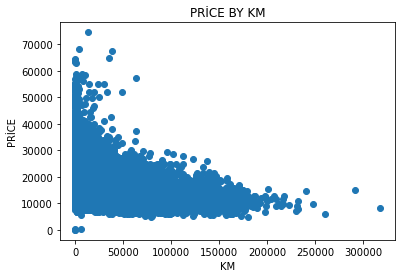

In [2522]:
import matplotlib.pyplot as plt
plt.scatter(cars["km"],cars["price"])
plt.xlabel("KM")
plt.ylabel("PRİCE")
plt.title("PRİCE BY KM")


In [2523]:
import seaborn as sns

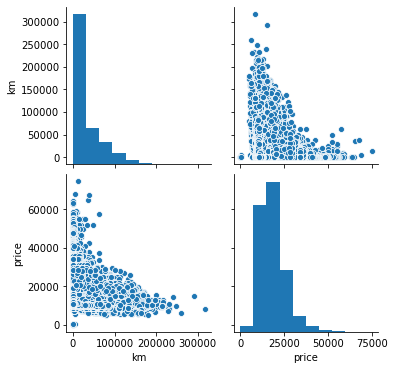

In [2524]:
sns.pairplot(cars[["km","price"]])

In [2525]:
cars.head()

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,Full Service,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Age,Types
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.0,01/2016,66 kW,\n2\n,"[\n, \n, \n4 (Green)\n]","[\n, \n]",[\nLR-062483\n],2016,"[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,4,Used
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000.0,03/2017,141 kW,NaN,NaN,NaN,NaN,2017,"[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,3,Used
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.0,02/2016,85 kW,\n1\n,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,[\nAM-95365\n],2016,"[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,4,Used
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,73000.0,08/2016,66 kW,\n1\n,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,2016,"[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with rem...","[\nAudi A1: , - 1e eigenaar , - Perfecte staat...",NaN,[\n6\n],NaN,4,Used
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,None,16200.0,05/2016,66 kW,\n1\n,"[\n, \n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]",[\nC1626\n],2016,"[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz Metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[4.1 l/100 km (comb)], [4.6 l/100 km (city)],...",[\n109 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport package, Sport suspension...","[ABS, Central door lock, Driver-side airbag, E...","[\n, Technik & 

## Previous owner column cleaning

In [2526]:
cars["Previous Owners"]=cars["Previous Owners"].str.replace("\n","") 
cars["Previous Owners"].head(5)

0      2
1    NaN
2      1
3      1
4      1
Name: Previous Owners, dtype: object

In [2527]:
cars["Previous Owners"].value_counts()

1    8101
2     766
0     163
3      17
4       2
Name: Previous Owners, dtype: int64

In [2528]:
for model in cars.make_model.unique():
    mod = cars[cars["make_model"]==model]["Previous Owners"].mode()[0]
    cars["Previous Owners"][cars["make_model"]==model] = cars["Previous Owners"][cars["make_model"]==model].fillna(mod)
    
    

<ipython-input-2528-e1c2d4df49b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars["Previous Owners"][cars["make_model"]==model] = cars["Previous Owners"][cars["make_model"]==model].fillna(mod)


In [2529]:
cars["Previous Owners"]=cars["Previous Owners"].astype(int)

In [2530]:
cars.groupby(["Types","make_model"] )["Previous Owners"].value_counts()
#new cars must not be used before. we need to replace "1" with "0"

Types           make_model      Previous Owners
Demonstration   Audi A1         1                   135
                Audi A3         1                    60
                                2                     2
                Opel Astra      1                   164
                                2                     1
                Opel Corsa      1                    89
                Opel Insignia   1                   172
                Renault Clio    1                    75
                                2                     1
                Renault Espace  1                    95
                                2                     2
Employee's car  Audi A1         1                   194
                                2                     2
                                0                     1
                Audi A2         1                     1
                Audi A3         1                   227
                                0                     1


In [2531]:
cars.loc[cars["Types"]=="New","Previous Owners"] = 0

In [2532]:
cars.groupby("First Registration")["Previous Owners"].value_counts()

First Registration  Previous Owners
2016                1                  3272
                    2                   388
                    0                    26
                    3                    10
                    4                     1
2017                1                  2972
                    2                   294
                    0                    41
                    3                     7
                    4                     1
2018                1                  4450
                    0                   172
                    2                    75
2019                1                  2750
                    0                  1451
                    2                     9
Name: Previous Owners, dtype: int64

In [2533]:
cars["Previous Owners"].value_counts()

1    13444
0     1690
2      766
3       17
4        2
Name: Previous Owners, dtype: int64

In [2534]:
cars.groupby("Previous Owners")["km"].mean()

Previous Owners
0      689.515976
1    35336.043884
2    41911.825065
3    48588.470588
4    38350.000000
Name: km, dtype: float64

In [2535]:
def unique_values(item):    # we return list values to string
    return item[1] if type(item) == list else item
#cars["Fuel"].apply(unique_values).value_counts()

# Fuel

In [2536]:
cars["Fuel"] = cars["Fuel"].apply(lambda x: x[1] if x is not np.nan else x)

In [2537]:
cars["Fuel"].isnull().sum()

0

In [2538]:
cars[cars["Fuel"].str.contains("Diesel")]["Fuel"]

0        Diesel (Particulate Filter)
2        Diesel (Particulate Filter)
3        Diesel (Particulate Filter)
4        Diesel (Particulate Filter)
5        Diesel (Particulate Filter)
                    ...             
15911    Diesel (Particulate Filter)
15912    Diesel (Particulate Filter)
15914    Diesel (Particulate Filter)
15916                         Diesel
15917                         Diesel
Name: Fuel, Length: 7299, dtype: object

In [2539]:
def fuel(item):
    x = item[1] if type(item) == list else item
   
    if "diesel" in x.lower():
        return "diesel"
    else:
        return "benzin"

In [2540]:
cars["Fuel"]=cars["Fuel"].apply(fuel)

In [2541]:
cars["Fuel"].unique()

array(['diesel', 'benzin'], dtype=object)

In [2542]:
cars["Fuel"].isnull().sum()

0

## body color

In [2543]:
cars["Body Color"] = cars["Body Color"].apply(unique_values)
#we got the values from the list convert string type

In [2544]:
cars["Body Color"].isnull().sum()

597

In [2545]:
cars.groupby("make_model")["Body Color"].value_counts(dropna=False)
#each model usually have black or grey color

C:\Users\mkdty\anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


make_model      Body Color
Audi A1         White         727
                Black         717
                Grey          327
                Blue          286
                Red           250
                Silver        130
                NaN            73
                Green          32
                Yellow         31
                Brown          22
                Beige          17
                Violet          2
Audi A2         Grey            1
Audi A3         Black         938
                Grey          721
                White         692
                Silver        297
                Blue          235
                Red           108
                NaN            73
                Brown          25
                Yellow          4
                Bronze          2
                Orange          1
                Violet          1
Opel Astra      Black         550
                Grey          540
                Silver        433
                White

In [2546]:
cars["Body Color"].fillna(value=None,method="bfill",limit=300,inplace=True)
cars["Body Color"].fillna(value=None,method="ffill",limit=300,inplace=True)

In [2547]:
#cars["Body Color"].fillna(cars.groupby("make_model")["Body Color"].transform(lambda x: x.fillna(x.mode())),inplace=True)

In [2548]:
cars["Body Color"].isnull().sum() 

0

In [2549]:
show_nans(cars,35)

Full Service       48.395000
Paint Type         36.258559
Cylinders          35.680633
Weight             43.809285
Drive chain        43.080596
Emission Label     74.967021
Country version    52.346253
dtype: float64

## CARS PAİNT TYPE & BODY COLOR ORİGİNAL

In [2550]:
cars["Paint Type"] = cars["Paint Type"].apply(fill_most).str.replace("\n","")

In [2551]:
cars["Paint Type"].isnull().sum()

5772

In [2552]:
paint = cars["Paint Type"]
paint.value_counts()

Metallic       9794
Uni/basic       347
Perl effect       6
Name: Paint Type, dtype: int64

In [2553]:
cars.groupby("make_model")["Paint Type"].value_counts(dropna=False)

make_model      Paint Type 
Audi A1         Metallic       1742
                NaN             808
                Uni/basic        63
                Perl effect       1
Audi A2         Metallic          1
Audi A3         Metallic       1792
                NaN            1208
                Uni/basic        97
Opel Astra      Metallic       1713
                NaN             785
                Uni/basic        26
                Perl effect       2
Opel Corsa      Metallic       1281
                NaN             883
                Uni/basic        53
                Perl effect       2
Opel Insignia   Metallic       1780
                NaN             795
                Uni/basic        23
Renault Clio    NaN             925
                Metallic        861
                Uni/basic        52
                Perl effect       1
Renault Duster  NaN              17
                Uni/basic        16
                Metallic          1
Renault Espace  Metallic        623


In [2554]:
cars["Paint Type"]= cars.groupby("make_model")["Paint Type"].ffill()
cars["Paint Type"].isnull().sum()
# fill values by model

7

In [2555]:
cars["Paint Type"].fillna("Metallic",inplace=True)

In [2556]:
cars.groupby("make_model")["Paint Type"].value_counts()

make_model      Paint Type 
Audi A1         Metallic       2507
                Uni/basic       106
                Perl effect       1
Audi A2         Metallic          1
Audi A3         Metallic       2923
                Uni/basic       174
Opel Astra      Metallic       2483
                Uni/basic        41
                Perl effect       2
Opel Corsa      Metallic       2130
                Uni/basic        87
                Perl effect       2
Opel Insignia   Metallic       2551
                Uni/basic        47
Renault Clio    Metallic       1697
                Uni/basic       106
                Perl effect      36
Renault Duster  Uni/basic        30
                Metallic          4
Renault Espace  Metallic        966
                Uni/basic        25
Name: Paint Type, dtype: int64

In [2557]:
cars["Paint Type"].unique()

array(['Metallic', 'Uni/basic', 'Perl effect'], dtype=object)

In [2558]:
#ars["Paint Type"].fillna(method="bfill",limit=300).isnull().sum()

# fixing column name

In [2559]:
cars = cars.rename(columns={"\nComfort & Convenience\n": "Comfort & Convenience", 
"\nEntertainment & Media\n": "Entertainment & Media","\nExtras\n":"Extra","\nSafety & Security\n":"Safety & Security"})

In [2560]:
cars.head()

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,Full Service,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,description,Emission Label,Gears,Country version,Age,Types
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.0,01/2016,66 kW,2,"[\n, \n, \n4 (Green)\n]","[\n, \n]",[\nLR-062483\n],2016,Black,Metallic,[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],diesel,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,4,Used
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000.0,03/2017,141 kW,1,NaN,NaN,NaN,2017,Red,Metallic,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],benzin,"[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,3,Used
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.0,02/2016,85 kW,1,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,[\nAM-95365\n],2016,Black,Metallic,[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],diesel,"[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,4,Used
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,73000.0,08/2016,66 kW,1,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,2016,Brown,Metallic,NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,diesel,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with rem...","[\nAudi A1: , - 1e eigenaar , - Perfecte staat...",NaN,[\n6\n],NaN,4,Used
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,None,16200.0,05/2016,66 kW,1,"[\n, \n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]",[\nC1626\n],2016,Black,Metallic,[\nMythosschwarz Metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],NaN,[\nfront\n],diesel,"[[4.1 l/100 km (comb)], [4.6 l/100 km (city)],...",[\n109 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport package, Sport suspension...","[ABS, Central door lock, Driver-side airbag, E...","[\n, Technik & Sicherheit:, Xenon plus, Klimaa...",NaN,NaN,[\nGermany\n],4,Used


## cars registration

In [2561]:
cars["registration"].isnull().sum()

0

In [2562]:
cars["registration"] = cars["registration"].apply(lambda x: np.nan if x == "-/-"else x)

In [2563]:
cars[["registration","First Registration"]]

,registration,First Registration
0,01/2016,2016
1,03/2017,2017
2,02/2016,2016
3,08/2016,2016
4,05/2016,2016
...,...,...
15914,NaN,2019
15915,01/2019,2019
15916,03/2019,2019
15917,06/2019,2019


In [2564]:
before = cars.groupby("First Registration")["registration"].value_counts(dropna=False)

In [2565]:
#before

In [2566]:
cars["registration"]=cars.groupby("First Registration")["registration"].bfill()

In [2567]:
cars["registration"].isnull().sum()

0

In [2568]:
cars.groupby("First Registration")["registration"].value_counts(dropna=False)

First Registration  registration
2016                03/2016         541
                    04/2016         538
                    02/2016         472
                    05/2016         465
                    06/2016         455
                    01/2016         379
                    07/2016         176
                    10/2016         160
                    11/2016         142
                    09/2016         141
                    12/2016         134
                    08/2016          94
2017                03/2017         480
                    05/2017         411
                    06/2017         411
                    04/2017         386
                    02/2017         371
                    01/2017         307
                    07/2017         221
                    11/2017         182
                    10/2017         155
                    09/2017         150
                    12/2017         125
                    08/2017         116
2018   

In [2569]:
cars["registration"].fillna(method="ffill",inplace=True)

In [2570]:
cars["registration"] = pd.to_datetime(cars["registration"])

In [2571]:
c = pd.Timestamp('2019-12-01')-cars["registration"]
a = c.dt.days//30


c 

0       1430 days
1       1005 days
2       1399 days
3       1217 days
4       1309 days
           ...   
15914    334 days
15915    334 days
15916    275 days
15917    183 days
15918    334 days
Name: registration, Length: 15919, dtype: timedelta64[ns]

In [2572]:
cars["age_as_month"]=a

In [2573]:
cars["age_as_month"].dtype

dtype('int64')

In [2574]:
cars.head(3)

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,Full Service,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,description,Emission Label,Gears,Country version,Age,Types,age_as_month
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.0,2016-01-01,66 kW,2,"[\n, \n, \n4 (Green)\n]","[\n, \n]",[\nLR-062483\n],2016,Black,Metallic,[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],diesel,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,4,Used,47
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000.0,2017-03-01,141 kW,1,NaN,NaN,NaN,2017,Red,Metallic,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],benzin,"[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,3,Used,33
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.0,2016-02-01,85 kW,1,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,[\nAM-95365\n],2016,Black,Metallic,[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],diesel,"[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,4,Used,46


# 	Warranty column

In [2575]:
#Nan_to_list(cars,"Warranty")
#unique_values1(cars,"Warranty")

In [2576]:
cars["Warranty"] = cars["Warranty"].apply(warranty)

In [2577]:
cars["Warranty"]

0                   \n
1                  NaN
2                   \n
3                  NaN
4                   \n
             ...      
15914    \n24 months\n
15915               \n
15916               \n
15917             None
15918              NaN
Name: Warranty, Length: 15919, dtype: object

In [2578]:
cars["Warranty"] = cars["Warranty"].str.replace("\n","") # we remove "\n" values

In [2579]:
NaN_rows = cars["Warranty"]=="" # to fill rows with "" values, we determine a condition

In [2580]:

cars.loc[NaN_rows, "Warranty"] = cars.loc[NaN_rows, "Warranty"].apply(lambda x: np.nan)
# we filled

In [2581]:
cars["Warranty"] = cars["Warranty"].str.replace("months","") # to cover str to int remove "months" strings

In [2582]:
cars["Warranty"].isnull().sum()

11066

In [2583]:
warranty = pd.Timestamp('2019-12-01')-cars["registration"] 
warranty = warranty.dt.days//30

warranty = 36 -warranty
warranty

0       -11
1         3
2       -10
3        -4
4        -7
         ..
15914    25
15915    25
15916    27
15917    30
15918    25
Name: registration, Length: 15919, dtype: int64

In [2584]:
cars["Warranty"].fillna(warranty,inplace=True)

In [2585]:
cars["Warranty"] = cars["Warranty"].astype(int)

In [2586]:
cars["Warranty"] = cars["Warranty"].apply(lambda x: 0 if x < 0 else x)

In [2587]:
cars["Warranty"]

0         0
1         3
2         0
3         0
4         0
         ..
15914    24
15915    25
15916    27
15917    30
15918    25
Name: Warranty, Length: 15919, dtype: int64

# show nan values

In [2588]:
def show_nans(df, limit):
    missing = df.isnull().sum()*100/df.shape[0]
    return missing.loc[lambda x : x > limit] 
# limit değerinden yüksek oranda missing value içeren sütunları sergiler. 
# örneğin limit = 35 ise yüzde 35'den fazla missing value içeren sütunları görmenizi sağlar.

In [2589]:
# önce bu çalıştırılarak nan içeren değerler boş listelere çevrilmeli ki diğer fonksiyon'da kullandığımız set() 
#fonksiyonu işe yarasın.
def Nan_to_list(data, column_name):
    NaN_rows = data[column_name].isnull()
    # Change the type of NaNs from 'float' to (empty) 'list'
    data.loc[NaN_rows, column_name] = data.loc[NaN_rows, column_name].apply(lambda x: [])

In [2590]:
# unique değerleri sergilemek için yukardaki fonksiyondan sonra bunu çalıştırmanız yeterli olucaktır.
def unique_values1(data, column_name):
    unique_vals = set()
    for rows in data[column_name]:
        unique_vals.update(rows)
    return list(unique_vals)

In [2591]:
def CO2(x):
    if type(x) == list:
        return x[0]

In [2592]:
cars["CO2 Emission"]

0         [\n99 g CO2/km (comb)\n]
1        [\n129 g CO2/km (comb)\n]
2         [\n99 g CO2/km (comb)\n]
3         [\n99 g CO2/km (comb)\n]
4        [\n109 g CO2/km (comb)\n]
                   ...            
15914    [\n139 g CO2/km (comb)\n]
15915    [\n168 g CO2/km (comb)\n]
15916    [\n139 g CO2/km (comb)\n]
15917    [\n139 g CO2/km (comb)\n]
15918    [\n153 g CO2/km (comb)\n]
Name: CO2 Emission, Length: 15919, dtype: object

# CO2

In [2593]:
# co2 func
cars["CO2 Emission"] = cars["CO2 Emission"].apply(CO2).str.extract("(\d\d\d|\d\d)")


In [2594]:
cars["CO2 Emission"].unique()

array(['99', '129', '109', '92', '98', '97', nan, '105', '112', '103',
       '102', '95', '104', '91', '94', '117', '123', '106', '108', '121',
       '107', '101', '113', '137', '100', '116', '114', '118', '331',
       '115', '119', '90', '136', '134', '110', '111', '120', '89', '142',
       '126', '122', '128', '127', '138', '130', '125', '85', '124',
       '152', '88', '189', '194', '149', '153', '188', '36', '060', '96',
       '990', '146', '135', '158', '12', '141', '172', '154', '150',
       '167', '174', '93', '133', '131', '145', '147', '156', '87', '148',
       '139', '151', '144', '168', '160', '170', '80', '132', '155', '14',
       '159', '143', '140', '82', '84', '165', '51', '157', '169', '166',
       '253', '164', '175', '190', '161', '239', '197', '184', '199',
       '13', '187', '181', '186', '177', '180', '162', '45', '171', '183',
       '191', '193'], dtype=object)

In [2595]:
cars["CO2 Emission"] = cars["CO2 Emission"].astype(float)

In [2596]:
cars["Fuel"].value_counts(dropna=False)

benzin    8619
diesel    7300
Name: Fuel, dtype: int64

In [2597]:
cars.groupby(["Fuel","make_model"])["CO2 Emission"].mean()

Fuel    make_model    
benzin  Audi A1           106.337107
        Audi A3           115.453791
        Opel Astra        123.108507
        Opel Corsa        129.667204
        Opel Insignia     140.161708
        Renault Clio      122.461014
        Renault Duster    177.000000
        Renault Espace    155.902542
diesel  Audi A1           100.100840
        Audi A2                  NaN
        Audi A3           106.306723
        Opel Astra        105.848875
        Opel Corsa         99.455556
        Opel Insignia     132.546485
        Renault Clio       89.529897
        Renault Espace    124.425243
Name: CO2 Emission, dtype: float64

In [2598]:
cars["CO2 Emission"]=cars.groupby(["Fuel","make_model"])["CO2 Emission"].ffill()

In [2599]:
cars["CO2 Emission"].fillna(method="bfill",inplace=True)


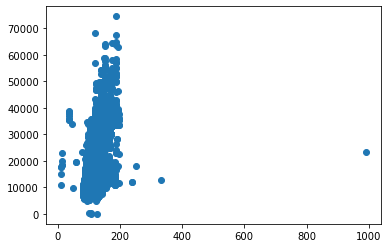

In [2600]:
cars["CO2 Emission"] =  cars["CO2 Emission"].astype(int)
plt.scatter(cars["CO2 Emission"],cars["price"])

In [2601]:
cars["CO2 Emission"].corr(cars["price"])

0.33477119541975703

# drop column

In [2602]:
cars.head()
cars.Extra.isnull().sum()

2962

In [2603]:
show_nans(cars,35)

Full Service       48.395000
Cylinders          35.680633
Weight             43.809285
Drive chain        43.080596
Emission Label     74.967021
Country version    52.346253
dtype: float64

# important

In [2604]:
cars[cars["Extra"].notnull()]["Extra"].apply(lambda x: ",".join(x[:]) ).str.get_dummies(",")

,Alloy wheels,Cab or rented Car,Catalytic Converter,Handicapped enabled,Right hand drive,Roof rack,Shift paddles,Ski bag,Sliding door,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
15915,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15916,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15917,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


# drop unuseless columns

In [2605]:
cars.drop(["Offer Number","Country version" ],inplace=True,axis=1)

In [2606]:
cars.drop("Full Service",axis=1,inplace=True)

In [2607]:
cars.drop("description",inplace=True,axis=1)

In [2608]:
cars.head()

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Emission Label,Gears,Age,Types,age_as_month
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.0,2016-01-01,66 kW,2,0,2016,Black,Metallic,[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],diesel,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",99,[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...",NaN,NaN,4,Used,47
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000.0,2017-03-01,141 kW,1,3,2017,Red,Metallic,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],benzin,"[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",129,[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\n4 (Green)\n],[\n7\n],3,Used,33
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.0,2016-02-01,85 kW,1,0,2016,Black,Metallic,[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],diesel,"[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",99,[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...",[\n4 (Green)\n],NaN,4,Used,46
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,73000.0,2016-08-01,66 kW,1,0,2016,Brown,Metallic,NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,diesel,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",99,[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with rem...",NaN,[\n6\n],4,Used,40
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,None,16200.0,2016-05-01,66 kW,1,0,2016,Black,Metallic,[\nMythosschwarz Metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],NaN,[\nfront\n],diesel,"[[4.1 l/100 km (comb)], [4.6 l/100 km (city)],...",109,[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport package, Sport suspension...","[ABS, Central door lock, Driver-side airbag, E...",NaN,NaN,4,Used,43


# Consumption column

In [2609]:
def consumption(x):
    
    if type(x) == list and type(x[0])==list : 
        return ",".join(x[0]+x[1]+x[2])
    elif type(x)==list and len(x)>3:
        return ",".join(x)
            
    

In [2610]:
from collections import Iterable
def flatten(lis):
    if isinstance(lis, str):
        yield lis
    elif lis is np.nan:
        return np.nan
    else:
        for item in lis:
            if isinstance(item, Iterable) and not isinstance(item, str):
                for x in flatten(item):
                     yield x
            else:
                 yield item
#return from nested list to one dimensional list                   

In [2611]:
cars["Consumption"].apply(flatten).apply(lambda x: list(x))

0        [3.8 l/100 km (comb), 4.3 l/100 km (city), 3.5...
1        [5.6 l/100 km (comb), 7.1 l/100 km (city), 4.7...
2        [3.8 l/100 km (comb), 4.4 l/100 km (city), 3.4...
3        [3.8 l/100 km (comb), 4.3 l/100 km (city), 3.5...
4        [4.1 l/100 km (comb), 4.6 l/100 km (city), 3.8...
                               ...                        
15914    [5.3 l/100 km (comb), 6.2 l/100 km (city), 4.7...
15915    [\n, 7.4 l/100 km (comb), \n, 9.2 l/100 km (ci...
15916    [5.3 l/100 km (comb), 6.2 l/100 km (city), 4.7...
15917    [5.3 l/100 km (comb), 6.2 l/100 km (city), 4.7...
15918    [6.8 l/100 km (comb), 8.7 l/100 km (city), 5.7...
Name: Consumption, Length: 15919, dtype: object

In [2612]:
#cars["Consumption"].apply(lambda x: x[0]+x[1]+x[3] if type(x) == list else x )
   

In [2613]:

cars["Consumption"]=cars["Consumption"].apply(consumption)


In [2614]:
cars["Consumption"].head(3)


0    3.8 l/100 km (comb),4.3 l/100 km (city),3.5 l/...
1    5.6 l/100 km (comb),7.1 l/100 km (city),4.7 l/...
2    3.8 l/100 km (comb),4.4 l/100 km (city),3.4 l/...
Name: Consumption, dtype: object

In [2615]:
cars["Consumption"] = cars["Consumption"].str.strip("\n,")
cars["Consumption"] = cars["Consumption"].str.replace("\n,","")


In [2616]:
cars["Consumption"]=cars["Consumption"].str.replace("l/100","")

In [2617]:
cons = cars["Consumption"].str.extract("(\d+.\d*|\d+).*,(\d+.\d*|\d+).*,(\d+.\d*|\d+)")

In [2618]:
cons

,0,1,2
0,3.8,4.3,3.5
1,5.6,7.1,4.7
2,3.8,4.4,3.4
3,3.8,4.3,3.5
4,4.1,4.6,3.8
...,...,...,...
15914,5.3,6.2,4.7
15915,7.4,9.2,6.3
15916,5.3,6.2,4.7
15917,5.3,6.2,4.7


In [2619]:
cars["Consumption"]

0        3.8  km (comb),4.3  km (city),3.5  km (country)
1        5.6  km (comb),7.1  km (city),4.7  km (country)
2        3.8  km (comb),4.4  km (city),3.4  km (country)
3        3.8  km (comb),4.3  km (city),3.5  km (country)
4        4.1  km (comb),4.6  km (city),3.8  km (country)
                              ...                       
15914    5.3  km (comb),6.2  km (city),4.7  km (country)
15915    7.4  km (comb),9.2  km (city),6.3  km (country)
15916    5.3  km (comb),6.2  km (city),4.7  km (country)
15917    5.3  km (comb),6.2  km (city),4.7  km (country)
15918    6.8  km (comb),8.7  km (city),5.7  km (country)
Name: Consumption, Length: 15919, dtype: object

In [2620]:
cons1 = cons[[0,1,2]].rename(columns={0: "Comb", 1: "City",2:"Country"})
cons1 = cons1.astype(float)

In [2621]:
cars = pd.concat([cars, cons1],axis=1)


In [2622]:
cars["City"].isnull().sum()

2555

In [2623]:
cars.drop(["Consumption"],axis=1,inplace=True)

# end of the consumption

In [2624]:
cars.head()

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Emission Label,Gears,Age,Types,age_as_month,Comb,City,Country
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.0,2016-01-01,66 kW,2,0,2016,Black,Metallic,[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],diesel,99,[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...",NaN,NaN,4,Used,47,3.8,4.3,3.5
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000.0,2017-03-01,141 kW,1,3,2017,Red,Metallic,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],benzin,129,[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\n4 (Green)\n],[\n7\n],3,Used,33,5.6,7.1,4.7
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.0,2016-02-01,85 kW,1,0,2016,Black,Metallic,[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],diesel,99,[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...",[\n4 (Green)\n],NaN,4,Used,46,3.8,4.4,3.4
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,73000.0,2016-08-01,66 kW,1,0,2016,Brown,Metallic,NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,diesel,99,[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with rem...",NaN,[\n6\n],4,Used,40,3.8,4.3,3.5
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,None,16200.0,2016-05-01,66 kW,1,0,2016,Black,Metallic,[\nMythosschwarz Metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],NaN,[\nfront\n],diesel,109,[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport package, Sport suspension...","[ABS, Central door lock, Driver-side airbag, E...",NaN,NaN,4,Used,43,4.1,4.6,3.8


In [2625]:
show_nans(cars, 35)

Cylinders         35.680633
Weight            43.809285
Drive chain       43.080596
Emission Label    74.967021
dtype: float64

# cars upholstery

In [2626]:
cars["Upholstery"]=cars["Upholstery"].apply(fix_column)


In [2627]:
cars["Upholstery"] = cars["Upholstery"].str.replace("\n","").str.strip()

In [2628]:
cars["Upholstery"]

0               Cloth, Black
1                Cloth, Grey
2               Cloth, Black
3                        NaN
4               Cloth, Black
                ...         
15914                    NaN
15915                  Cloth
15916    Full leather, Black
15917           Part leather
15918    Full leather, Brown
Name: Upholstery, Length: 15919, dtype: object

In [2629]:
#cars["registration"][(cars["km"] >= x) & (cars["km"] < y)] = cars["registration"][(cars["km"] >= x) & (cars["km"] < y)].fillna(a[0])
    #return cars["registration"][(cars["km"] >= x) & (cars["km"] < y)]

In [2630]:
def fill_mode(data,column):
    mod1 = stats.mode(data.loc[cars[column].notnull(),column])
    mod = stats.mode(data[column])
    if mod is not np.nan:
        data[column] = data[column].fillna(mod)
    else:
        data[column] = data[column].fillna(mod1)
    return data[column] 

    

In [2631]:
cars["Upholstery"].isnull().sum()

3720

In [2632]:
cars["Upholstery"].str.get_dummies(",")

,Beige,Black,Blue,Brown,Grey,Orange,Other,Red,White,Yellow,Beige,Black,Blue,Brown,Cloth,Full leather,Grey,Other,Part leather,Velour,White,alcantara
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15915,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
15916,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
15917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [2633]:
cars["Upholstery"] = cars.groupby("make_model")["Upholstery"].ffill()

In [2634]:
cars["Upholstery"].fillna(cars["Upholstery"].mode()[0],inplace=True)

In [2635]:
cars["Upholstery"]

0               Cloth, Black
1                Cloth, Grey
2               Cloth, Black
3               Cloth, Black
4               Cloth, Black
                ...         
15914    Full leather, Brown
15915                  Cloth
15916    Full leather, Black
15917           Part leather
15918    Full leather, Brown
Name: Upholstery, Length: 15919, dtype: object

# BODY COLUMN

In [2636]:
cars["Body"] = cars["Body"].apply(fix_column).str.replace("\n","").str.strip()
#we fill nan values with mode value

In [2637]:
cars["Body"].isnull().sum()

60

In [2638]:
cars.groupby("make_model")["Body"].value_counts(dropna=False)

make_model      Body         
Audi A1         Sedans           1538
                Compact          1039
                Station wagon      21
                Other              13
                Coupe               2
                Van                 1
Audi A2         Off-Road            1
Audi A3         Sedans           2598
                Station wagon     282
                Compact           182
                Other              16
                Convertible         8
                NaN                 7
                Coupe               4
Opel Astra      Station wagon    1211
                Sedans           1053
                Compact           185
                Other              67
                NaN                 7
                Coupe               2
                Off-Road            1
Opel Corsa      Compact          1230
                Sedans            875
                Other              87
                Coupe              13
                Tran

In [2639]:
cars["Body"]=cars.groupby("make_model")["Body"].ffill()

In [2640]:
cars.groupby("make_model")["Body"].value_counts()

make_model      Body         
Audi A1         Sedans           1538
                Compact          1039
                Station wagon      21
                Other              13
                Coupe               2
                Van                 1
Audi A2         Off-Road            1
Audi A3         Sedans           2604
                Station wagon     283
                Compact           182
                Other              16
                Convertible         8
                Coupe               4
Opel Astra      Station wagon    1214
                Sedans           1054
                Compact           187
                Other              68
                Coupe               2
                Off-Road            1
Opel Corsa      Compact          1230
                Sedans            877
                Other              87
                Coupe              13
                Transporter         7
                Off-Road            3
                Van 

# nr doors column

In [2641]:
cars["Nr. of Doors"] = cars["Nr. of Doors"].apply(fix_column).str.replace("\n","").str.strip()

In [2642]:
cars["Nr. of Doors"].isnull().sum()

212

# nr seats

In [2643]:
cars["Nr. of Seats"] = cars["Nr. of Seats"].apply(fix_column).str.replace("\n","").str.strip()

In [2644]:
cars["Nr. of Seats"].isnull().sum()

977

In [2645]:
cars["Nr. of Seats"] = cars["Nr. of Seats"].astype(float)

In [2646]:
cars.groupby(["make_model", "Body"])["Nr. of Seats"].value_counts(dropna=False)

make_model      Body           Nr. of Seats
Audi A1         Compact        5.0              538
                               4.0              431
                               NaN               68
                               3.0                1
                               6.0                1
                Coupe          4.0                1
                               5.0                1
                Other          5.0               12
                               4.0                1
                Sedans         5.0              827
                               4.0              641
                               NaN               70
                Station wagon  5.0               14
                               4.0                6
                               NaN                1
                Van            NaN                1
Audi A2         Off-Road       5.0                1
Audi A3         Compact        5.0              175
                    

In [2647]:
cars.groupby(["make_model", "Body"])["Nr. of Seats"].ffill().isnull().sum()

14

In [2648]:
cars["Nr. of Seats"].fillna(method="bfill",inplace=True)

In [2649]:
cars["Nr. of Seats"].value_counts(dropna=False)

5.0    14167
4.0     1200
7.0      416
2.0      133
6.0        2
3.0        1
Name: Nr. of Seats, dtype: int64

In [2650]:
cars["Nr. of Seats"]

0        5.0
1        4.0
2        4.0
3        4.0
4        5.0
        ... 
15914    5.0
15915    5.0
15916    7.0
15917    7.0
15918    5.0
Name: Nr. of Seats, Length: 15919, dtype: float64

In [2651]:
cars[(cars["Nr. of Seats"]==4)]

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Emission Label,Gears,Age,Types,age_as_month,Comb,City,Country
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000.0,2017-03-01,141 kW,1,3,2017,Red,Metallic,NaN,"Cloth, Grey",Sedans,3,4.0,"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],benzin,129,[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\n4 (Green)\n],[\n7\n],3,Used,33,5.6,7.1,4.7
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.0,2016-02-01,85 kW,1,0,2016,Black,Metallic,[\nmythosschwarz metallic\n],"Cloth, Black",Sedans,4,4.0,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],diesel,99,[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...",[\n4 (Green)\n],NaN,4,Used,46,3.8,4.4,3.4
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,73000.0,2016-08-01,66 kW,1,0,2016,Brown,Metallic,NaN,"Cloth, Black",Sedans,3,4.0,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,diesel,99,[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with rem...",NaN,[\n6\n],4,Used,40,3.8,4.3,3.5
8,Audi A1,SPB 1.6 TDI S-tronic Metal plus + Xeno,Sedans,16700,None,57000.0,2016-02-01,85 kW,1,12,2016,Grey,Metallic,[\nGrigio\n],"Cloth, Grey",Sedans,5,4.0,"[\n, Automatic, \n]","[\n1,598 cc\n]",[\n4\n],"[\n1,275 kg\n]",[\nfront\n],diesel,97,[\nEuro 6\n],"[Air conditioning, Power windows]",[Radio],[Alloy wheels],"[ABS, Central door lock, Driver-side airbag, E...",NaN,[\n7\n],4,Used,46,3.7,4.3,3.4
9,Audi A1,SPORTBACK TFSI ULTRA 95 S-TRONIC AMB.,Sedans,17990,None,16103.0,2017-06-01,70 kW,1,3,2017,White,Metallic,[\nBlanc\n],"Cloth, Grey",Sedans,5,4.0,"[\n, Automatic, \n]",[\n999 cc\n],NaN,NaN,NaN,benzin,129,NaN,NaN,NaN,NaN,NaN,NaN,[\n7\n],3,Used,30,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13815,Renault Clio,1.5 dCi 8V 75CV Start&Stop 5 porte Van 4 posti N1,Sedans,8700,None,30.0,2018-07-01,55 kW,1,19,2018,White,Uni/basic,[\nBianco\n],"Cloth, Black",Sedans,5,4.0,"[\n, Manual, \n]","[\n1,461 cc\n]",[\n4\n],"[\n1,216 kg\n]",[\nfront\n],diesel,104,[\nEuro 6\n],"[Cruise control, Park Distance Control, Power ...","[Bluetooth, CD player, Hands-free equipment, M...",NaN,"[ABS, Central door lock, Daytime running light...",NaN,[\n5\n],2,Pre-registered,17,4.0,4.4,3.6
13963,Renault Clio,Sporter dCi 8V 90CV S,Station wagon,9000,Price negotiable,40000.0,2017-06-01,66 kW,1,6,2017,Grey,Metallic,NaN,"alcantara, Black",Station wagon,5,4.0,"[\n, Manual, \n]","[\n1,461 cc\n]",[\n4\n],"[\n1,196 kg\n]",NaN,diesel,82,[\nEuro 6\n],"[Air conditioning, Armrest, Light sensor, Pano...","[CD player, Hands-free equipment, On-board com...",[Alloy wheels],"[ABS, Alarm system, Central door lock, Daytime...",NaN,[\n5\n],3,Used,30,3.2,3.4,3.1
14112,Renault Clio,dCi 8V 75 CV ENERGY INTENS,Sedans,9900,None,19900.0,2017-01-01,55 kW,1,1,2017,White,Metallic,NaN,"Cloth, Black",Sedans,5,4.0,"[\n, Manual, \n]","[\n1,461 cc\n]",[\n4\n],"[\n1,146 kg\n]",NaN,diesel,85,[\nEuro 6\n],"[Air conditioning, Start-stop system]",[On-board computer],[Alloy wheels],"[ABS, Alarm system, Central door lock, Driver-...",NaN,[\n5\n],3,Used,35,3.3,3.5,3.1
14356

In [2652]:
cars[(cars["make_model"]=="Audi A1")][cars["Nr. of Seats"]==4]

<ipython-input-2652-3d7d4a749269>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cars[(cars["make_model"]=="Audi A1")][cars["Nr. of Seats"]==4]


,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Emission Label,Gears,Age,Types,age_as_month,Comb,City,Country
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000.0,2017-03-01,141 kW,1,3,2017,Red,Metallic,NaN,"Cloth, Grey",Sedans,3,4.0,"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],benzin,129,[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\n4 (Green)\n],[\n7\n],3,Used,33,5.6,7.1,4.7
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.0,2016-02-01,85 kW,1,0,2016,Black,Metallic,[\nmythosschwarz metallic\n],"Cloth, Black",Sedans,4,4.0,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],diesel,99,[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...",[\n4 (Green)\n],NaN,4,Used,46,3.8,4.4,3.4
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,73000.0,2016-08-01,66 kW,1,0,2016,Brown,Metallic,NaN,"Cloth, Black",Sedans,3,4.0,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,diesel,99,[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with rem...",NaN,[\n6\n],4,Used,40,3.8,4.3,3.5
8,Audi A1,SPB 1.6 TDI S-tronic Metal plus + Xeno,Sedans,16700,None,57000.0,2016-02-01,85 kW,1,12,2016,Grey,Metallic,[\nGrigio\n],"Cloth, Grey",Sedans,5,4.0,"[\n, Automatic, \n]","[\n1,598 cc\n]",[\n4\n],"[\n1,275 kg\n]",[\nfront\n],diesel,97,[\nEuro 6\n],"[Air conditioning, Power windows]",[Radio],[Alloy wheels],"[ABS, Central door lock, Driver-side airbag, E...",NaN,[\n7\n],4,Used,46,3.7,4.3,3.4
9,Audi A1,SPORTBACK TFSI ULTRA 95 S-TRONIC AMB.,Sedans,17990,None,16103.0,2017-06-01,70 kW,1,3,2017,White,Metallic,[\nBlanc\n],"Cloth, Grey",Sedans,5,4.0,"[\n, Automatic, \n]",[\n999 cc\n],NaN,NaN,NaN,benzin,129,NaN,NaN,NaN,NaN,NaN,NaN,[\n7\n],3,Used,30,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,Audi A1,SPB 30 TFSI 116CV Admired,Sedans,22200,VAT deductible,10.0,2019-04-01,85 kW,1,28,2019,Black,Metallic,[\nNero Mythos Met\n],"Cloth, Black",Sedans,5,4.0,"[\n, Manual, \n]",[\n999 cc\n],[\n3\n],"[\n1,230 kg\n]",[\nfront\n],benzin,108,[\nEuro 6\n],"[Air conditioning, Electrical side mirrors, Le...","[Bluetooth, Radio, USB]",[Alloy wheels],"[ABS, Central door lock, Driver-side airbag, E...",NaN,[\n6\n],1,Pre-registered,8,4.8,5.9,4.1
2566,Audi A1,Sportback 25 TFSI 95PS 5-Gang Navi Klima PDC,Compact,22080,VAT deductible,0.0,2019-01-01,70 kW,0,25,2019,Black,Metallic,[\nTiomangrün Mythosschwarz\n],"Cloth, Black",Compact,5,4.0,"[\n, Manual, \n]",[\n999 cc\n],NaN,"[\n1,165 kg\n]",NaN,benzin,104,[\nEuro 6\n],"[Air conditioning, Armrest, Electrical side mi...","[On-board computer, Radio, USB]",[Voice Control],"[ABS, Central door lock, Daytime running light...",NaN,[\n5\n],1,New,11,4.6,5.8,3.9
2596,Audi A1,Sportback 1.0 Tfsi 96pk Admired S-Line **NIEUW...,Compact,21900,None,32.0,2019-01-01,71 kW,1,25,2019,White,Metallic,[\nLicht Gletsjer Wit Metall\n],"Cloth, Black",Compact,5,4.0,"[\n, Manual, \n]",[\n999 cc\n],[\n3\n],"[\n1,035 kg\n]",[\nfront\n],benzin,98,[\nEuro 6\n],"[Air conditioning, Armrest, Cruise control, El...","[On-board computer, Radio]",[Alloy wheels],"[ABS, Alarm system, Central door lock, Driver-..."

# gear type

In [2653]:
cars["Gearing Type"]=cars["Gearing Type"].apply(fix_column).str.replace("\n","").str.strip()

In [2654]:
cars["Gearing Type"].isnull().sum() # no nan values

0

In [2655]:
cars["Gearing Type"].value_counts(dropna=False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: Gearing Type, dtype: int64

In [2656]:
gear = cars["Gearing Type"].str.get_dummies()

In [2657]:
gear.head()

,Automatic,Manual,Semi-automatic
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


# Displacement

In [2705]:
cars["Displacement"] = cars["Displacement"].apply(fix_column).str.replace("\n","").str.strip()

In [2704]:
cars["Displacement"] = cars["Displacement"].str.replace("cc","").str.strip()
cars["Displacement"] = cars["Displacement"].str.replace(",","")
# we want convert str values to int values, but "," preventing us


In [2703]:
cars["Displacement"].isnull().sum()

496

In [2661]:
#cars.loc[cars["Displacement"].notnull(),"Displacement"] =cars.loc[cars["Displacement"].notnull(),"Displacement"].astype(int)

In [2662]:
cars["Displacement"] = cars["Displacement"].astype(float)

In [2706]:
cars.groupby(["make_model","hp","Weight"])["Displacement"].transform("mean")

0        1422.000
1        1798.000
2        1598.000
3        1422.000
4        1422.000
           ...   
15914    1997.000
15915    1798.000
15916    1997.000
15917    1997.000
15918    1792.375
Name: Displacement, Length: 15919, dtype: float64

In [2707]:
cars["Displacement"].fillna(cars.groupby(["make_model","hp","Weight"])["Displacement"].transform("mean"),inplace=True)

In [2708]:
cars["Displacement"]=cars["Displacement"].fillna(method="bfill")

In [ ]:
cars.head()

# cylinders column

In [2693]:
cars["Cylinders"] =  cars["Cylinders"].apply(fix_column).str.replace("\n","").str.strip()


In [2694]:
cars["Cylinders"] = cars["Cylinders"].astype(float)

In [2695]:
cars["Cylinders"].isnull().sum()

5680

In [2696]:
cars["Cylinders"].unique()

array([ 3.,  4., nan,  8.,  5.,  1.,  6.,  2.])

In [2697]:
cars[cars["Cylinders"]>4]

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Emission Label,Gears,Age,Types,age_as_month,Comb,City,Country
535,Audi A1,1.0 TFSI 5-türer Klima Sitzheizung,Compact,12990,None,41200.0,2016-02-01,70.0,1,0,2016,Silver,Metallic,[\nFlorettesilber\n],"Cloth, Black",Compact,NaN,4.0,Manual,999.0,8.0,1186.094382,[\nfront\n],benzin,331,[\nEuro 4\n],"[Air conditioning, Automatic climate control, ...",NaN,"[Ski bag, Sport suspension]","[ABS, Alarm system, Central door lock, Driver-...",NaN,NaN,4,Used,46,13.8,19.9,10.3
3587,Audi A3,RS 3 SPB 2.5 TFSI quattro S tronic,Sedans,64900,None,35000.0,2018-04-01,294.0,1,16,2018,Grey,Metallic,NaN,"Full leather, Black",Sedans,5,5.0,Semi-automatic,2480.0,5.0,1585.000000,NaN,benzin,189,[\nEuro 6\n],"[Air conditioning, Seat ventilation, Split rea...",[Radio],[Alloy wheels],"[Adaptive Cruise Control, Alarm system, Centra...",NaN,[\n7\n],2,Used,20,8.3,11.3,6.6
3590,Audi A3,RS 3 SPB Quattro S Tronic,Sedans,62900,None,700.0,2019-03-01,294.0,1,27,2019,Grey,Metallic,NaN,"Part leather, Black",Sedans,5,5.0,Semi-automatic,2480.0,5.0,1585.000000,NaN,benzin,194,[\nEuro 6d-TEMP\n],"[Air conditioning, Seat ventilation, Split rea...","[Bluetooth, Radio]",[Alloy wheels],"[ABS, Adaptive Cruise Control, Alarm system, C...",NaN,[\n7\n],1,Used,9,8.3,11.3,6.6
3592,Audi A3,RS 3 SPB 2.5 TFSI quattro S tronic ! FAST VOLL,Sedans,56900,None,5200.0,2018-08-01,294.0,1,20,2018,Grey,Metallic,[\nDAYTONA PERLATO\n],"Full leather, Black",Sedans,5,5.0,Semi-automatic,2480.0,5.0,1585.000000,[\n4WD\n],benzin,189,[\nEuro 6\n],"[Air conditioning, Air suspension, Armrest, Au...","[Bluetooth, CD player, Digital radio, Hands-fr...","[Alloy wheels, Shift paddles, Sport package, S...","[ABS, Adaptive Cruise Control, Adaptive headli...",NaN,[\n7\n],2,Used,16,8.3,11.3,6.6
3593,Audi A3,RS 3 SPB 2.5 TFSI quattro S tronic,Sedans,58500,None,10000.0,2018-05-01,294.0,1,17,2018,White,Metallic,NaN,"Full leather, Black",Sedans,5,5.0,Semi-automatic,2480.0,5.0,1585.000000,NaN,benzin,189,[\nEuro 6\n],"[Air conditioning, Seat ventilation, Split rea...",[Radio],[Alloy wheels],"[Adaptive Cruise Control, Alarm system, Centra...",NaN,[\n7\n],2,Used,19,8.3,11.3,6.6
3595,Audi A3,RS 3 SPB 2.5 TFSI quattro S tronic,Station wagon,63900,VAT deductible,10.0,2019-06-01,294.0,1,24,2019,Black,Metallic,[\nMytoss nero\n],"Part leather, Black",Station wagon,5,5.0,Semi-automatic,2480.0,5.0,1585.000000,NaN,benzin,189,[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Digital radio, Hands-fr...","[Alloy wheels, Shift paddles, Ski bag, Sport p...","[ABS, Adaptive Cruise Control, Adaptive headli...",NaN,[\n7\n],1,Used,6,8.3,11.3,6.6
3596,Audi A3,RS 3 SPB 2.5 TFSI quattro S tronic,Sedans,57400,Price negotiable,63000.0,2018-01-01,294.0,1,13,2018,Blue,Metallic,NaN,"Full leather, Black",Sedans,5,5.0,Semi-automatic,2480.0,5.0,1585.000000,[\n4WD\n],benzin,189,[\nEuro 6\n],"[Air conditioning, Air suspension, Armrest, Au...","[Bluetooth, CD player, Hands-free equipment, O...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Adaptive Cruise Control, Adaptive headli...",NaN,[\n7\n],2,Used,23,8.3,11.3,6.6
3598,Audi A3,RS 3 SPB 2.5 TFSI quattro S tronic,Sedans,55000,VAT deductible,24000.0,2017-10-01,294.0,1,10,2017,Black,Metallic,NaN,"Part leather, Black",Sedans,5,5.0,Semi-automatic,2480.0,5.0,1585.000000,NaN,benzin,189,[\nEuro 6\n],"[Air conditioning, Seat ventilation, Split rea...",[Radio],[Alloy wheels],"[Adaptive Cruise Control, Alarm system, Centra...",NaN,[\n7\n],3,Used,26,8.3,11.3,6.6
3599,Audi A3,RS 3 Sedan 2.5 TFSI quattro S tronic,Sedans,55000,None,30000.0,2018-03-01,294.0,1,15,2018,Grey,Metallic,NaN,"Part leather, Black",Sedans,4,5.0,Se

In [2699]:
cars["Cylinders"] = cars.groupby(["make_model","Displacement","hp"])["Cylinders"].ffill()

In [2700]:
cars["Cylinders"].fillna(method="bfill",inplace=True)

# hp column

In [2675]:
#cars["hp"] = cars["hp"].str.strip("kW")
#cars["hp"] = cars["hp"].str.strip()


In [2676]:
cars["hp"]=cars["hp"].apply(lambda x: np.nan if x == "-" else x)

In [2677]:
cars.groupby("make_model")["hp"].value_counts(dropna=False)

make_model      hp    
Audi A1         85 kW      890
                70 kW      791
                66 kW      465
                92 kW      172
                60 kW      156
                71 kW       56
                110 kW      30
                141 kW      16
                147 kW      14
                67 kW       12
                87 kW        4
                93 kW        3
                - kW         2
                112 kW       1
                140 kW       1
                86 kW        1
Audi A2         85 kW        1
Audi A3         85 kW     1629
                81 kW      785
                110 kW     503
                92 kW       93
                135 kW      24
                294 kW      18
                82 kW       15
                96 kW        9
                87 kW        6
                228 kW       2
                270 kW       2
                - kW         1
                100 kW       1
                112 kW       1
                

In [2678]:
cars['hp'] = cars['hp'].str.extract('(\d+)').astype(float)

In [2679]:
cars['hp'].unique()

array([ 66., 141.,  85.,  70.,  92., 112.,  60.,  71.,  67., 110.,  93.,
       147.,  86., 140.,  87.,  nan,  81.,  82., 135., 132., 100.,  96.,
       162., 150., 294., 228., 270., 137.,   9., 133.,  77., 101.,  78.,
       103.,   1.,  74., 118.,  84.,  88.,  80.,  76., 149.,  44.,  51.,
        55.,  52.,  63.,  40.,  65.,  75., 125., 120., 184., 239., 121.,
       143., 191.,  89., 195., 127., 122., 154., 155., 104., 123., 146.,
        90.,  53.,  54.,  56., 164.,   4., 163.,  57., 119., 165., 117.,
       115.,  98., 168., 167.])

In [2680]:
cars['hp']=cars.groupby(["make_model","Displacement","Weight"])["hp"].bfill()

In [2681]:
cars.groupby(["make_model","Cylinders"])["hp"]

In [2682]:
cars['hp'].fillna(method="bfill",inplace=True)

In [2683]:
cars["hp"].isnull().sum()

0

In [2684]:
cars.groupby(["Displacement","make_model","Weight"])["hp"].value_counts()


Displacement  make_model     Weight       hp   
1.0           Opel Insignia  1403.000000  147.0    1
                             1437.000000  100.0    1
                             1440.000000  125.0    1
                             1441.000000  147.0    1
                             1487.000000  100.0    1
                                                  ..
2480.0        Audi A3        1590.000000  294.0    2
                             1595.000000  270.0    2
2967.0        Opel Insignia  2295.000000  100.0    1
15898.0       Opel Astra     1350.000000  100.0    1
16000.0       Opel Insignia  1561.666667  88.0     1
Name: hp, Length: 1441, dtype: int64

# weight column

In [2664]:
cars["Weight"] = cars["Weight"].apply(fix_column).str.replace("\n","").str.strip() # we apply same method
#
cars["Weight"] = cars["Weight"].str.replace(",","").str.strip()
# order to convert int we need to remove strings
cars["Weight"] = cars["Weight"].str.replace("kg","").str.strip()

cars["Weight"]

0        1220
1        1255
2         NaN
3        1195
4         NaN
         ... 
15914    1758
15915    1708
15916     NaN
15917    1758
15918    1685
Name: Weight, Length: 15919, dtype: object

In [2665]:
cars["Weight"] = cars["Weight"].astype(float)
#now we can convert values to int

In [2666]:
cars["Weight"].isnull().sum()

6974

In [2667]:
cars.groupby(["make_model","hp","Displacement"])["Weight"].transform("mean")

0        1227.309322
1        1323.750000
2        1330.563953
3        1227.309322
4        1227.309322
            ...     
15914    1808.194444
15915    1685.067227
15916    1773.400000
15917    1808.194444
15918    1685.067227
Name: Weight, Length: 15919, dtype: float64

In [2668]:
cars["Weight"].fillna(cars.groupby(["make_model","hp","Displacement"])["Weight"].transform("mean"),inplace=True)

In [2669]:
cars["Weight"].fillna(method="bfill",inplace=True)

In [2670]:
q1 = cars["Weight"].quantile(0.25)
q3 =  cars["Weight"].quantile(0.75)
ıqr = q3-q1
ıqr


lower_lim=q1-2.5 *ıqr
upper_lim=q3+2.5 *ıqr

outlier_low =(cars["Weight"] < lower_lim)
outlier_up =(cars["Weight"]> upper_lim)

In [2671]:
cars["Weight"][outlier_low]

1143     102.0
8355       1.0
12779      1.0
Name: Weight, dtype: float64

In [2672]:
cars.groupby(["make_model"])["Weight"].value_counts()

make_model      Weight     
Audi A1         1186.094382    333
                1227.309322    221
                1259.368564    206
                1165.000000    171
                1135.000000    162
                1180.000000    140
                1330.563953    126
                1200.000000    104
                1222.575758    103
                1195.000000    101
                1250.000000     80
                1179.635135     79
                1110.000000     76
                1275.000000     57
                1230.000000     55
                1205.000000     40
                1065.000000     37
                1680.000000     32
                1215.000000     26
                1220.000000     26
                1255.000000     26
                1580.000000     23
                1071.857143     19
                1695.000000     18
                1655.000000     17
                1090.000000     15
                1640.000000     14
                1105.000000

In [2673]:
cars[outlier_up]

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Emission Label,Gears,Age,Types,age_as_month,Comb,City,Country
10475,Opel Insignia,2.0 CDTI Sports T. Business Innovation,Station wagon,16490,VAT deductible,96760.0,2016-03-01,125 kW,1,12,2016,Black,Metallic,[\nCARBON FLASH MET (G) (zwa\n],"Full leather, Beige",Station wagon,5,5.0,Automatic,1956.0,NaN,2320.0,[\nfront\n],diesel,149,[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Roof rack, Touch screen, Voice ...","[ABS, Adaptive Cruise Control, Blind spot moni...",NaN,NaN,4,Used,45,5.6,7.8,4.3
10600,Opel Insignia,2.0CDTI Excellence Aut. 170,Sedans,15400,None,112789.0,2017-02-01,125 kW,1,12,2017,Black,Metallic,[\nNEGRO\n],"Full leather, Black",Sedans,4,5.0,Automatic,1956.0,[\n4\n],2300.0,NaN,diesel,147,NaN,"[Air conditioning, Automatic climate control, ...",[On-board computer],[Alloy wheels],"[ABS, Driver-side airbag, Electronic stability...",NaN,[\n6\n],3,Employee's car,34,NaN,NaN,NaN
10618,Opel Insignia,1.6CDTI Selective Aut. 136,Sedans,14100,None,101291.0,2017-02-01,100 kW,1,12,2017,White,Metallic,[\nBLANCO\n],"Full leather, Grey",Sedans,4,5.0,Automatic,1598.0,[\n4\n],2300.0,NaN,diesel,129,NaN,"[Air conditioning, Automatic climate control, ...",[On-board computer],[Alloy wheels],"[ABS, Driver-side airbag, Electronic stability...",NaN,[\n6\n],3,Employee's car,34,NaN,NaN,NaN
10623,Opel Insignia,2.0 CDTI Sports T. Aut. Business Edition,Station wagon,13990,VAT deductible,94119.0,2016-05-01,125 kW,1,12,2016,Grey,Metallic,[\nSHINY ROCK MET (grijs met\n],"Cloth, Black",Station wagon,5,5.0,Automatic,1956.0,NaN,2320.0,[\nfront\n],diesel,149,[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, MP3, On-boar...","[Roof rack, Touch screen, Voice Control]","[ABS, Blind spot monitor, Daytime running ligh...",NaN,NaN,4,Used,43,5.6,7.8,4.3
10638,Opel Insignia,SW 2.0 Cdti Cosmo 170cv At6 4x4,Station wagon,14900,VAT deductible,70968.0,2016-04-01,125 kW,1,24,2016,White,Metallic,[\nOLYMPIC WHITE (G) (wit me\n],"Full leather, Other",Station wagon,5,5.0,Automatic,1956.0,NaN,2450.0,[\n4WD\n],diesel,161,[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Roof rack, Voice Control]","[ABS, Central door lock, Driver-side airbag, E...",NaN,NaN,4,Used,44,6.2,8.5,4.9
10646,Opel Insignia,SW 2.0 Cdti Cosmo 170cv 4x4,Station wagon,14500,VAT deductible,88617.0,2016-03-01,125 kW,1,24,2016,White,Metallic,[\nOLYMPIC WHITE (G)\n],"Part leather, Other",Station wagon,5,5.0,Automatic,1956.0,NaN,2450.0,[\n4WD\n],diesel,161,[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Roof rack, Voice Control]","[ABS, Central door lock, Driver-side airbag, E...",NaN,NaN,4,Used,45,6.2,8.5,4.9
10666,Opel Insignia,2.0 CDTI Excellence Auto 125 k,Sedans,13950,VAT deductible,89000.0,2016-05-01,125 kW,1,12,2016,Black,Metallic,[\nNegro\n],"Cloth, Black",Sedans,5,5.0,Automatic,1956.0,[\n4\n],2300.0,NaN,diesel,147,[\nEuro 6\n],"[Air conditioning, Cruise control, Electricall...",[On-board computer],[Alloy wheels],"[ABS, Central door lock, Daytime running light...",NaN,[\n6\n],4,Used,43,5.6,8.6,4.2
10723,Opel Insignia,2.0 CDTI Excellence Auto 125 k,Sedans,13150,VAT deductible,87000.0,2017-01-01,125 kW,1,12,2017,Grey,Metallic,[\nGris\n],"Cloth, Black",Sedans,5,5.0,Automatic,1956.0,[\n4\n],2300.0,NaN,diesel,147,[\nEuro 6\n],"[Air conditioning, Cruise control, Electricall...",[On-board computer],[Alloy wheels],"[ABS, Central door lock, Daytime running light..

# Drive chain

In [2709]:
cars["Drive chain"].apply(fix_column).str.replace("\n","").str.strip()
cars["Drive chain"] = cars["Drive chain"].apply(fix_column).str.replace("\n","").str.strip()

In [2710]:
cars["Drive chain"].isnull().sum()

6858

In [2711]:
cars.groupby("Drive chain")["price"].mean()

Drive chain
4WD      31022.590643
front    18613.144835
rear     15332.500000
Name: price, dtype: float64

In [2712]:
cars.groupby(["make_model","Drive chain"])["price"].mean()

make_model      Drive chain
Audi A1         4WD            15010.000000
                front          19467.344950
Audi A2         front          28200.000000
Audi A3         4WD            35959.684211
                front          21029.064741
Opel Astra      4WD            13075.000000
                front          16227.840267
Opel Corsa      front          11564.284615
Opel Insignia   4WD            29566.095745
                front          22244.768630
                rear           16946.666667
Renault Clio    4WD            21151.545455
                front          11671.222642
                rear           10490.000000
Renault Duster  4WD            11425.000000
Renault Espace  4WD            37892.975000
                front          30580.260776
Name: price, dtype: float64

In [2713]:
cars.drop("Drive chain",inplace=True,axis=1)

# emission class

In [ ]:
cars.head()

In [2714]:
def emission(x):
    for i in x:
        if type(x[0])==list and type(x)== list:
            return np.nan

In [2715]:
cars["Emission Class"] = cars["Emission Class"].apply(lambda x:x[0] if type(x)==list else x )
# we convert list value to string

In [2716]:
cars["Emission Class"]

0              \nEuro 6\n
1              \nEuro 6\n
2              \nEuro 6\n
3              \nEuro 6\n
4              \nEuro 6\n
               ...       
15914                 NaN
15915                 NaN
15916    \nEuro 6d-TEMP\n
15917          \nEuro 6\n
15918          \nEuro 6\n
Name: Emission Class, Length: 15919, dtype: object

In [2717]:
cars["Emission Class"] = emms.apply(lambda x:np.nan if type(x)==list else x )
# we convert empty list to nan values    

In [2718]:
cars["Emission Class"]

0              \nEuro 6\n
1              \nEuro 6\n
2              \nEuro 6\n
3              \nEuro 6\n
4              \nEuro 6\n
               ...       
15914                 NaN
15915                 NaN
15916    \nEuro 6d-TEMP\n
15917          \nEuro 6\n
15918          \nEuro 6\n
Name: Emission Class, Length: 15919, dtype: object

In [2719]:
cars["Emission Class"].isnull().sum()

3628

In [2720]:
cars["Emission Class"].unique()
    

array(['\nEuro 6\n', nan, '\nEuro 5\n', '\nEuro 6d-TEMP\n', '\nEuro 6c\n',
       '\nEuro 4\n', '\nEuro 6d\n'], dtype=object)

In [2721]:
cars["Emission Class"]=cars["Emission Class"].str.replace("\n","").str.strip()

In [2722]:
cars.groupby("Emission Class")["City"].mean()

Emission Class
Euro 4          9.969565
Euro 5          5.644928
Euro 6          5.719436
Euro 6c         6.345600
Euro 6d         6.681967
Euro 6d-TEMP    6.854883
Name: City, dtype: float64

In [2723]:
cars["City"].mean()

5.964673750374299

In [2724]:
cars[cars["City"]==66]["Comb"].count()

1

In [2725]:
cars.head()

,make_model,short_description,body_type,price,vat,km,registration,hp,Previous Owners,Warranty,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Fuel,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extra,Safety & Security,Emission Label,Gears,Age,Types,age_as_month,Comb,City,Country
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.0,2016-01-01,66.0,2,0,2016,Black,Metallic,[\nMythosschwarz\n],"Cloth, Black",Sedans,5,5.0,Automatic,1422.0,3.0,1220.000000,diesel,99,Euro 6,"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...",NaN,NaN,4,Used,47,3.8,4.3,3.5
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000.0,2017-03-01,141.0,1,3,2017,Red,Metallic,NaN,"Cloth, Grey",Sedans,3,4.0,Automatic,1798.0,4.0,1255.000000,benzin,129,Euro 6,"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\n4 (Green)\n],[\n7\n],3,Used,33,5.6,7.1,4.7
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.0,2016-02-01,85.0,1,0,2016,Black,Metallic,[\nmythosschwarz metallic\n],"Cloth, Black",Sedans,4,4.0,Automatic,1598.0,3.0,1330.563953,diesel,99,Euro 6,"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...",[\n4 (Green)\n],NaN,4,Used,46,3.8,4.4,3.4
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,73000.0,2016-08-01,66.0,1,0,2016,Brown,Metallic,NaN,"Cloth, Black",Sedans,3,4.0,Automatic,1422.0,3.0,1195.000000,diesel,99,Euro 6,"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with rem...",NaN,[\n6\n],4,Used,40,3.8,4.3,3.5
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,None,16200.0,2016-05-01,66.0,1,0,2016,Black,Metallic,[\nMythosschwarz Metallic\n],"Cloth, Black",Sedans,5,5.0,Automatic,1422.0,3.0,1227.309322,diesel,109,Euro 6,"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport package, Sport suspension...","[ABS, Central door lock, Driver-side airbag, E...",NaN,NaN,4,Used,43,4.1,4.6,3.8


In [2726]:
cars.isnull().sum()

make_model                   0
short_description           46
body_type                   60
price                        0
vat                       4513
km                           0
registration                 0
hp                           0
Previous Owners              0
Warranty                     0
First Registration           0
Body Color                   0
Paint Type                   0
Body Color Original       3759
Upholstery                   0
Body                         1
Nr. of Doors               212
Nr. of Seats                 0
Gearing Type                 0
Displacement                 0
Cylinders                    0
Weight                       0
Fuel                         0
CO2 Emission                 0
Emission Class            3628
Comfort & Convenience      920
Entertainment & Media     1374
Extra                     2962
Safety & Security          982
Emission Label           11934
Gears                     4712
Age                          0
Types   

# Comfort & Convenience column

In [2727]:
def fix_column(x):
    if type(x) == list:
        return ",".join([i for i in x])
    elif type(x) != list and type(x) !=float:
        return x
    else: return x

In [2728]:
cars["Comfort & Convenience"]=cars["Comfort & Convenience"].apply(fix_column)

In [2729]:
cars["Comfort & Convenience"]=cars.groupby("make_model")["Comfort & Convenience"].ffill()

In [2730]:
cars["Comfort & Convenience"].isnull().sum()

0

In [2731]:
cars["Comfort & Convenience"]

0        Air conditioning,Armrest,Automatic climate con...
1        Air conditioning,Automatic climate control,Hil...
2        Air conditioning,Cruise control,Electrical sid...
3        Air suspension,Armrest,Auxiliary heating,Elect...
4        Air conditioning,Armrest,Automatic climate con...
                               ...                        
15914    Air conditioning,Automatic climate control,Cru...
15915    Air conditioning,Automatic climate control,Cru...
15916    Air conditioning,Armrest,Automatic climate con...
15917    Air conditioning,Automatic climate control,Cru...
15918    Air conditioning,Automatic climate control,Cru...
Name: Comfort & Convenience, Length: 15919, dtype: object

In [2732]:
comfort = cars["Comfort & Convenience"].str.get_dummies(",")
comfort

,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield
0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
2,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0
3,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0
4,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0
15915,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0
15916,1,0,1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,0
15917,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


# Entertainment & Media

In [2733]:
cars["Entertainment & Media"]=cars["Entertainment & Media"].apply(fix_column) # we convert list type to str

In [2734]:
cars["Entertainment & Media"]=cars.groupby("make_model")["Entertainment & Media"].ffill()

In [2735]:
cars["Entertainment & Media"].fillna(method="bfill",inplace=True)

In [2736]:
cars["Entertainment & Media"]

0        Bluetooth,Hands-free equipment,On-board comput...
1        Bluetooth,Hands-free equipment,On-board comput...
2                                    MP3,On-board computer
3        Bluetooth,CD player,Hands-free equipment,MP3,O...
4        Bluetooth,CD player,Hands-free equipment,MP3,O...
                               ...                        
15914    Bluetooth,Digital radio,Hands-free equipment,O...
15915    Bluetooth,Digital radio,Hands-free equipment,R...
15916    Bluetooth,Hands-free equipment,On-board comput...
15917                    Bluetooth,Digital radio,Radio,USB
15918                                                  USB
Name: Entertainment & Media, Length: 15919, dtype: object

In [2737]:
media= cars["Entertainment & Media"].str.get_dummies(",")

In [2738]:
media

,Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,Sound system,Television,USB
0,1,0,0,1,0,1,1,0,0,0
1,1,0,0,1,0,1,1,1,0,0
2,0,0,0,0,1,1,0,0,0,0
3,1,1,0,1,1,1,1,1,0,1
4,1,1,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
15914,1,0,1,1,0,1,1,0,0,1
15915,1,0,1,1,0,0,1,0,0,1
15916,1,0,0,1,0,1,1,0,0,0
15917,1,0,1,0,0,0,1,0,0,1


# Extra, 	Safety & Security

In [2739]:
cars["Safety & Security"] = cars["Safety & Security"].apply(fix_column)

In [2740]:
cars["Safety & Security"] =cars.groupby("make_model")["Safety & Security"].ffill()

In [2741]:
cars["Safety & Security"].isnull().sum()

0

In [2742]:
safety = cars["Safety & Security"].str.get_dummies(",")
safety

,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights
0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1
2,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
3,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0
4,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0
15915,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,0
15916,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,0,1,1,0
15917,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,1,0,1,0


In [2743]:
safety # What features do vehicles have

,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights
0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1
2,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
3,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0
4,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0
15915,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,0
15916,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,0,1,1,0
15917,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,1,0,1,0


# Extra column


In [2744]:
cars["Extra"] = cars["Extra"].apply(fix_column)

In [2745]:
cars["Extra"].isnull().sum()

2962

In [2746]:
cars["Extra"] = cars.groupby("make_model")["Extra"].ffill()

In [2747]:
cars["Extra"].fillna(method="ffill",inplace=True)

In [2748]:
#cars[cars["Extra"].notnull()]["Extra"].apply(lambda x: ",".join(x[:]) ).str.get_dummies(",")
extra = cars["Extra"].str.get_dummies(",")
extra

,Alloy wheels,Cab or rented Car,Catalytic Converter,Handicapped enabled,Right hand drive,Roof rack,Shift paddles,Ski bag,Sliding door,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
15915,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15916,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15917,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


# new csv

In [2749]:
cars.to_csv("cleaned_cars.csv")

In [3]:
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, np.nan]],
                  columns=['A', 'B', 'C'])

In [4]:
df

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,6.0
2,7.0,8.0,9.0
3,NaN,NaN,NaN


In [6]:
df.agg(['sum', 'min',"mean"])

,A,B,C
sum,12.0,15.0,18.0
min,1.0,2.0,3.0
mean,4.0,5.0,6.0
